In [2]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt

tf.set_random_seed(7)
def MinMaxScaler(data):
    numerator=data-np.min(data)
    denominator=np.max(data)-np.min(data)
    return numerator/(denominator+1e-7)
#input data to be normalized
#Parameters
#-------------
#data: numpy.ndarray
#      shape: [Batch size, dimension]

#Returns
#--------------
#data: numpy.ndarray
#      normalized data
#      shape [Batch size, dimension]
#load data
#year(3), month(4), day of week(6)
xy=np.genfromtxt('./lstmData/lstmPrac1.csv', delimiter=',')



In [3]:
mean=np.mean(xy[:,-1])
mean

35.191435768261968

In [4]:
std=np.std(xy[:,-1])
std

36.518152240039889

In [5]:
for i in range(len(xy)):
    if (xy[i,-1]<mean-0.8*std or xy[i,-1]>mean+0.8*std):
         xy[i,-1]=mean
        

In [6]:
xy

array([[   1.        ,    1.        ,    1.        ,   34.        ],
       [   2.        ,    1.        ,    2.        ,   41.        ],
       [   2.        ,    1.        ,    3.        ,   54.        ],
       ..., 
       [   2.        ,    1.        ,  395.        ,   35.19143577],
       [   1.        ,    1.        ,  396.        ,   35.19143577],
       [   1.        ,    1.        ,  397.        ,   31.        ]])

In [5]:
xy[119,-1]

35.191435768261968

[[ 1.          1.          1.          0.48275862]
 [ 2.          1.          2.          0.60344827]
 [ 2.          1.          3.          0.82758621]
 [ 1.          1.          4.          0.60344827]
 [ 1.          1.          5.          0.5       ]
 [ 1.          1.          6.          0.65517241]
 [ 1.          1.          7.          0.75862069]] -> [ 0.62068965]
[[ 2.          1.          2.          0.60344827]
 [ 2.          1.          3.          0.82758621]
 [ 1.          1.          4.          0.60344827]
 [ 1.          1.          5.          0.5       ]
 [ 1.          1.          6.          0.65517241]
 [ 1.          1.          7.          0.75862069]
 [ 1.          1.          8.          0.62068965]] -> [ 0.62068965]
[[ 2.          1.          3.          0.82758621]
 [ 1.          1.          4.          0.60344827]
 [ 1.          1.          5.          0.5       ]
 [ 1.          1.          6.          0.65517241]
 [ 1.          1.          7.          0.75862

 [   1.            2.          124.            0.60344827]] -> [ 0.51724138]
[[   1.            2.          119.            0.50330062]
 [   1.            2.          120.            0.50330062]
 [   2.            2.          121.            0.75862069]
 [   2.            2.          122.            0.89655172]
 [   1.            2.          123.            0.46551724]
 [   1.            2.          124.            0.60344827]
 [   1.            2.          125.            0.51724138]] -> [ 1.]
[[   1.            2.          120.            0.50330062]
 [   2.            2.          121.            0.75862069]
 [   2.            2.          122.            0.89655172]
 [   1.            2.          123.            0.46551724]
 [   1.            2.          124.            0.60344827]
 [   1.            2.          125.            0.51724138]
 [   1.            2.          126.            1.        ]] -> [ 0.74137931]
[[   2.            2.          121.            0.75862069]
 [   2.   

[step: 0] loss: 154.4114227294922
[step: 1] loss: 113.63288879394531
[step: 2] loss: 94.39244079589844
[step: 3] loss: 80.47091674804688
[step: 4] loss: 69.52259826660156
[step: 5] loss: 60.248443603515625
[step: 6] loss: 51.851226806640625
[step: 7] loss: 43.69169998168945
[step: 8] loss: 35.050987243652344
[step: 9] loss: 25.878835678100586
[step: 10] loss: 19.286863327026367
[step: 11] loss: 15.642045974731445
[step: 12] loss: 13.3571195602417
[step: 13] loss: 12.07314682006836
[step: 14] loss: 13.268594741821289
[step: 15] loss: 13.443063735961914
[step: 16] loss: 13.361085891723633
[step: 17] loss: 13.17358684539795
[step: 18] loss: 12.851448059082031
[step: 19] loss: 12.774212837219238
[step: 20] loss: 12.827159881591797
[step: 21] loss: 12.881393432617188
[step: 22] loss: 12.897346496582031
[step: 23] loss: 12.871326446533203
[step: 24] loss: 12.806868553161621
[step: 25] loss: 12.706772804260254
[step: 26] loss: 12.571464538574219
[step: 27] loss: 12.399287223815918
[step: 28] 

[step: 265] loss: 6.731937885284424
[step: 266] loss: 6.7300615310668945
[step: 267] loss: 6.728207588195801
[step: 268] loss: 6.726376056671143
[step: 269] loss: 6.724566459655762
[step: 270] loss: 6.722777366638184
[step: 271] loss: 6.721006393432617
[step: 272] loss: 6.719257354736328
[step: 273] loss: 6.717525005340576
[step: 274] loss: 6.715811729431152
[step: 275] loss: 6.714116096496582
[step: 276] loss: 6.712437629699707
[step: 277] loss: 6.710775852203369
[step: 278] loss: 6.709130764007568
[step: 279] loss: 6.707502841949463
[step: 280] loss: 6.705890655517578
[step: 281] loss: 6.704293251037598
[step: 282] loss: 6.702712059020996
[step: 283] loss: 6.701146602630615
[step: 284] loss: 6.699594974517822
[step: 285] loss: 6.69805908203125
[step: 286] loss: 6.696537017822266
[step: 287] loss: 6.6950297355651855
[step: 288] loss: 6.693536758422852
[step: 289] loss: 6.692056655883789
[step: 290] loss: 6.6905903816223145
[step: 291] loss: 6.689138412475586
[step: 292] loss: 6.687698

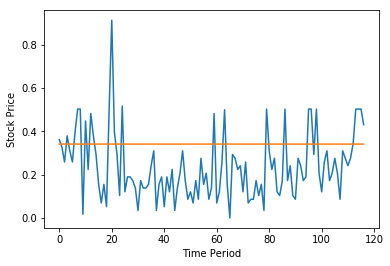

[step: 0] loss: 154.4114227294922
[step: 1] loss: 113.63289642333984
[step: 2] loss: 94.39244842529297
[step: 3] loss: 80.47091674804688
[step: 4] loss: 69.5226058959961
[step: 5] loss: 60.248443603515625
[step: 6] loss: 51.851219177246094
[step: 7] loss: 43.69169998168945
[step: 8] loss: 35.050987243652344
[step: 9] loss: 25.878835678100586
[step: 10] loss: 19.286863327026367
[step: 11] loss: 15.642045974731445
[step: 12] loss: 13.3571195602417
[step: 13] loss: 12.073147773742676
[step: 14] loss: 13.268594741821289
[step: 15] loss: 13.443063735961914
[step: 16] loss: 13.36108684539795
[step: 17] loss: 13.173585891723633
[step: 18] loss: 12.851449966430664
[step: 19] loss: 12.774212837219238
[step: 20] loss: 12.827160835266113
[step: 21] loss: 12.88139533996582
[step: 22] loss: 12.897348403930664
[step: 23] loss: 12.871326446533203
[step: 24] loss: 12.806869506835938
[step: 25] loss: 12.706774711608887
[step: 26] loss: 12.571465492248535
[step: 27] loss: 12.399288177490234
[step: 28] l

[step: 267] loss: 6.728207588195801
[step: 268] loss: 6.726376056671143
[step: 269] loss: 6.724566459655762
[step: 270] loss: 6.722777366638184
[step: 271] loss: 6.721006393432617
[step: 272] loss: 6.719256401062012
[step: 273] loss: 6.717525482177734
[step: 274] loss: 6.715811729431152
[step: 275] loss: 6.714115619659424
[step: 276] loss: 6.712437629699707
[step: 277] loss: 6.710776329040527
[step: 278] loss: 6.709131240844727
[step: 279] loss: 6.707502841949463
[step: 280] loss: 6.705890655517578
[step: 281] loss: 6.704293251037598
[step: 282] loss: 6.702712535858154
[step: 283] loss: 6.701146602630615
[step: 284] loss: 6.6995954513549805
[step: 285] loss: 6.698058128356934
[step: 286] loss: 6.696536540985107
[step: 287] loss: 6.6950297355651855
[step: 288] loss: 6.693536281585693
[step: 289] loss: 6.692056655883789
[step: 290] loss: 6.6905903816223145
[step: 291] loss: 6.689137935638428
[step: 292] loss: 6.6876983642578125
[step: 293] loss: 6.686272621154785
[step: 294] loss: 6.6848

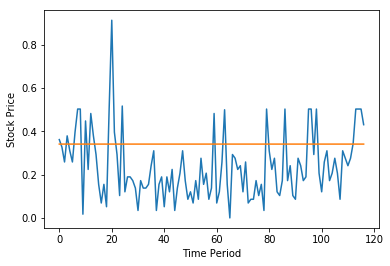

In [6]:
#train parameters
seq_length=7
data_dim=4
hidden_dim=10
output_dim=1
learning_rate=0.01
iterations=500
#기본형식
#기본 인자로는 ds-y로 받고 
#처리함수에서 ds를 받아서 'feature 처리모듈'에서 ds에서 요일(주중, 주말), 월(계절) + 날씨와 같은 추가 요인-값을 받는다.
xy[:,3]=MinMaxScaler(xy[:,3])

x=xy
y=xy[:,[-1]]

#build a dataset
dataX=[]
dataY=[]
for i in range(0, len(y)-seq_length):
    _x=x[i:i+seq_length]
    _y=y[i+seq_length]
    print(_x,"->",_y)
    dataX.append(_x)
    dataY.append(_y)

# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:])

#input place holders
X=tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y=tf.placeholder(tf.float32, [None, 1])
# build a LSTM network(input: cell shape, type/ )
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

# use the last cell's output to calculate Y_pred
Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn=tf.tanh) 
# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)
# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()


In [ ]:
np.mean(xy[:,1])